In [1]:
import pandas as pd              
import numpy as np             
import matplotlib.pyplot as plt  
import seaborn as sns            

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\punee\Downloads\dataset.csv")
df.head()

,Mess_ID,Date,Weekly_Crowd,Is_Holiday,Temperature,Menu_Score,Event_Intensity_Index,Stress_Level
0,1,5/2/2010,16437,0,42.31,2.428,7.04,8.106
1,1,12/2/2010,16420,1,38.51,2.452,7.04,8.106
2,1,19-02-2010,16120,0,39.93,2.486,7.04,8.106
3,1,26-02-2010,14097,0,46.63,2.439,7.04,8.106
4,1,5/3/2010,15548,0,46.50,2.375,7.05,8.106


In [3]:
# Convert all to datetime safely, regardless of / or -
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

df = df.dropna(subset=['Date'])                 # Drop any invalid date rows

df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')     # Format all dates as dd-mm-yyyy (with dashes)

df

,Mess_ID,Date,Weekly_Crowd,Is_Holiday,Temperature,Menu_Score,Event_Intensity_Index,Stress_Level
0,1,05-02-2010,16437,0,42.31,2.428,7.04,8.106
1,1,12-02-2010,16420,1,38.51,2.452,7.04,8.106
4,1,05-03-2010,15548,0,46.50,2.375,7.05,8.106
5,1,12-03-2010,14395,0,57.79,2.333,7.05,8.106
8,1,02-04-2010,15950,0,62.27,2.281,7.03,7.808
...,...,...,...,...,...,...,...,...
6422,45,03-08-2012,7257,0,76.58,1.346,6.37,8.684
6423,45,10-08-2012,7330,0,78.65,1.278,6.37,8.684
6427,45,07-09-2012,7665,1,75.70,1.089,6.39,8.684
6431,45,05-10-2012,7335,0,64.89,1.015,6.41,8.667


In [4]:
df_model = df.copy()                                       # Copy to avoid changing the original DataFrame

df_model['Date'] = pd.to_datetime(df_model['Date'])         # Convert 'Date' column to datetime

df_model['Month'] = df_model['Date'].dt.month               # Extract Month and Year
df_model['Year'] = df_model['Date'].dt.year

# Encode Mess_ID 
le = LabelEncoder()
df_model['Mess_ID'] = le.fit_transform(df_model['Mess_ID'])

In [5]:
# Define features and target
features = [
    'Mess_ID',
    'Is_Holiday',
    'Temperature',
    'Menu_Score',
    'Event_Intensity_Index',
    'Stress_Level',
    'Month',
    'Year'
]
target = 'Weekly_Crowd'

X = df_model[features]
y = df_model[target]

In [6]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# Train Random Forest model
model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=42)

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R² Score: {r2:.4f}")


 Mean Squared Error (MSE): 1025268.04
 R² Score: 0.9685


C:\Users\punee\AppData\Local\Temp\ipykernel_24776\2071721854.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


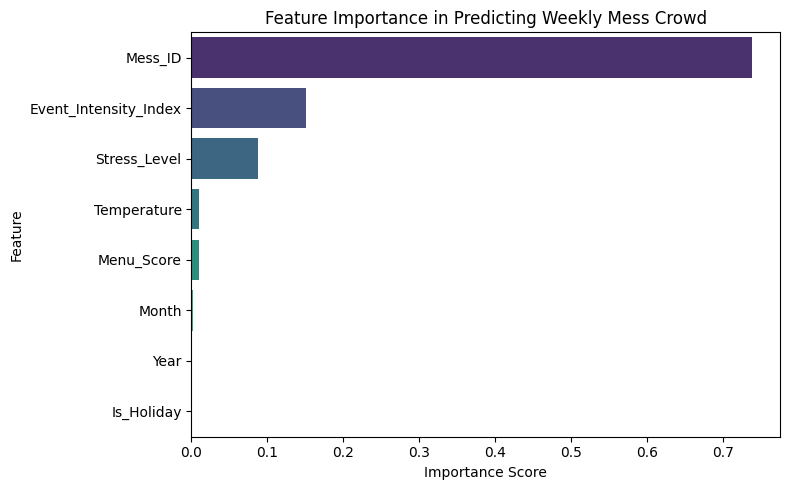

In [9]:
# Feature importance plot
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance in Predicting Weekly Mess Crowd")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
